In [5]:
import cv2
import math
  
# Opens the inbuilt camera of laptop to capture video.
cap = cv2.VideoCapture("/Users/abhishekvaidyanathan/Downloads/10BestVideoGameEndCreditsEver.mp4")
print("hello:",cap.read())
i = 0
# frameRate = cap.get(5) #frame rate
frameRate = 15
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
      
    # This condition prevents from infinte looping 
    # incase video ends.
    if ret == False:
        break
      
    # Save Frame by Frame into disk using imwrite method
    if (frameId % math.floor(frameRate) == 0):
        print(frameId)
        cv2.imwrite('/Users/abhishekvaidyanathan/Desktop/EDGE/10bestvideocredits/Frame'+str(i)+'.jpg', frame)
        i += 1

    if cv2.waitKey(1) == ord('q'):
        break

# while(cap.isOpened()):
#     frameId = cap.get(1) #current frame number
#     ret, frame = cap.read()
#     if (ret != True):
#         break
#     if (frameId % math.floor(frameRate) == 0):
#         filename = imagesFolder + "/image_" +  str(int(frameId)) + ".jpg"
#         cv2.imwrite(filename, frame)
  
cap.release()
cv2.destroyAllWindows()

hello: (True, array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [2

KeyboardInterrupt: 

In [6]:
import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [7]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image, kernel):
    # kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image,kernel):
    # kernel = np.ones((5,5),np.uint8)
    # print(kernel)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

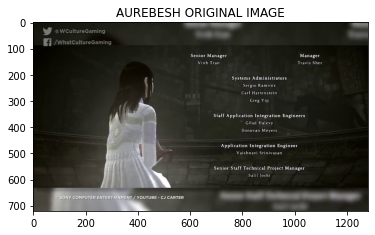

In [8]:

# Plot original image

image = cv2.imread("/Users/abhishekvaidyanathan/Desktop/EDGE/Frames-Extraction/Frame205.jpg")
image = cv2.imread("/Users/abhishekvaidyanathan/Desktop/EDGE/Frames-Extraction/Frame237.jpg")
image = cv2.imread("/Users/abhishekvaidyanathan/Desktop/EDGE/10bestvideocredits/Frame310.jpg")
# image = cv2.imread("/Users/abhishekvaidyanathan/Desktop/GAN.png")
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('AUREBESH ORIGINAL IMAGE')
plt.show()

In [9]:
kernel = np.ones((1,1),np.uint8)

gray_img = get_grayscale(image)
# erode_img = erode(gray_img, kernel)
# thresh_img = thresholding(gray_img)
erode_img = erode(gray_img, kernel)

opening_img = opening(gray_img, kernel)
dilate_img = dilate(opening_img)
# canny = canny(gray)

images = {'gray': gray_img, 
          'erode': erode_img,
        #   'thresh': thresh_img, 
          'opening': opening_img, 
          'dilate': dilate_img
        #   'canny': canny
          }
cv2.imwrite('/Users/abhishekvaidyanathan/Desktop/erode'+str(i)+'.jpg', erode_img)

True

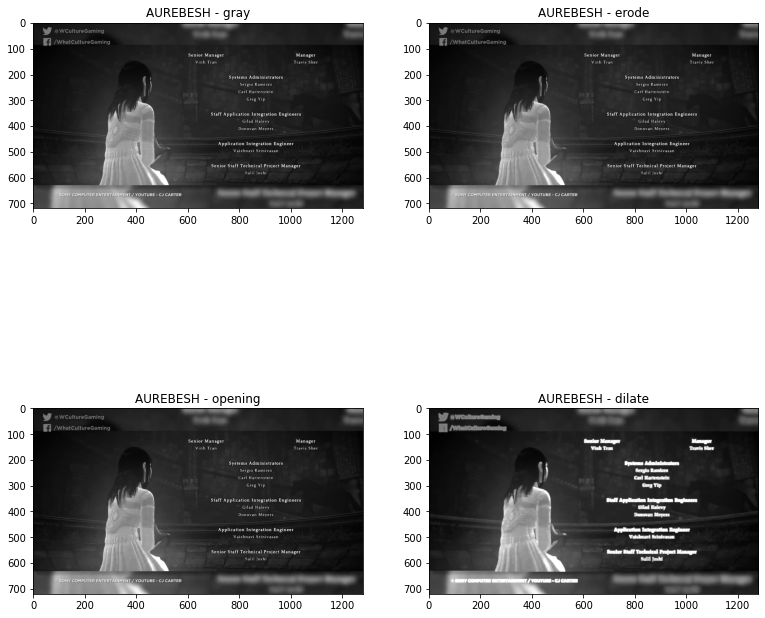

In [10]:

# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('AUREBESH - ' + keys[i]) 
    plt.imshow(images[keys[i]], cmap='gray')

In [11]:

# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 11'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> GRAY IMAGE')
print('-----------------------------------------')

print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(images['erode'], config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(images['opening'], config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> DILATE EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(images['dilate'], config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> GRAY IMAGE
-----------------------------------------
ee afl

cor @WCultureGaming

al ital

ow

Ei /WhatCultureGaming

Rota ety Cag

Manager

MARC

eRe

Systems Administrators

Reece

| /

(ert Bre tuniout

eras at

Staff Applic

OW CC onthe

rem ieag

Donovan Meyers

PN ECON Tete hog

Vaishnavi Srinivasan

Senior Staff Technical Project Manager

Sane

o

oi

Sy

fe)

IBE - CJ CARTER

celled


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
ee afl

cor @WCultureGaming

al ital

ow

Ei /WhatCultureGaming

Rota ety Cag

Manager

MARC

eRe

Systems Administrators

Reece

| /

(ert Bre tuniout

eras at

Staff Applic

OW CC onthe

rem ieag

Donovan Meyers

PN ECON Tete hog

Vaishnavi Srinivasan

Senior Staff Technical Project Manager

Sane

o

oi

Sy

fe)

IBE - CJ CARTER

celled


-----------------------------------------
TESSERACT OUTPUT --> OPENED IMA

In [12]:
print(pytesseract.image_to_string("/Users/abhishekvaidyanathan/Desktop/EDGE/Frames-Extraction/Frame205.jpg"))

Ta ety

ANTHONY NEWMAN ~~ KURT MARGENAU



In [14]:
!python3 /Users/abhishekvaidyanathan/Desktop/attention-ocr/predict.py --image=/Users/abhishekvaidyanathan/Desktop/erode3.jpg

Traceback (most recent call last):
  File "/Users/abhishekvaidyanathan/Desktop/attention-ocr/predict.py", line 1, in <module>
    from model import Model
  File "/Users/abhishekvaidyanathan/Desktop/attention-ocr/model.py", line 2, in <module>
    import tensorflow as tf
ModuleNotFoundError: No module named 'tensorflow'


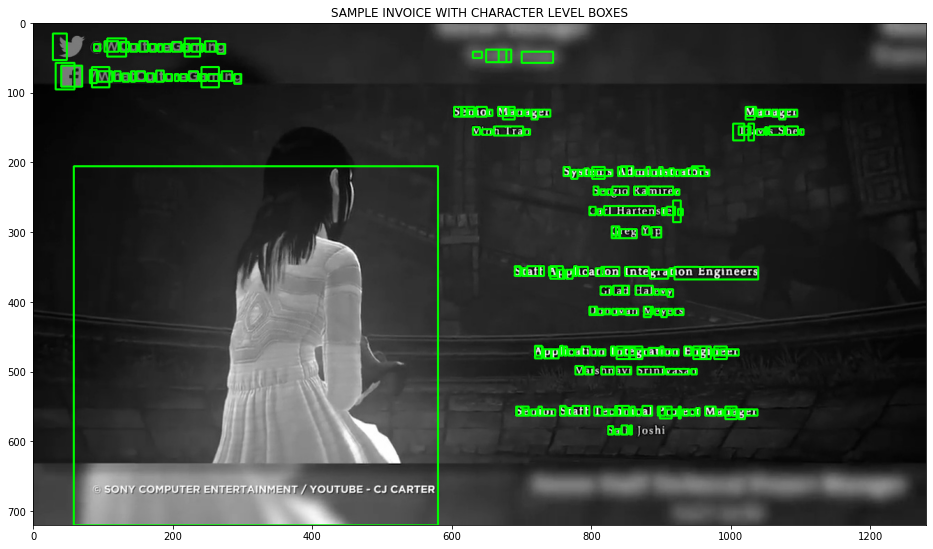

In [13]:
image = cv2.imread('/Users/abhishekvaidyanathan/Desktop/erode3.jpg')
h, w, c = image.shape
boxes = pytesseract.image_to_boxes(image) 
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH CHARACTER LEVEL BOXES')
plt.show()

In [14]:

# Output with outputbase digits

custom_config = r'-l eng --oem 3 --psm 6'
print(pytesseract.image_to_string(gray_img, config=custom_config))

ee afl Ree
@WCultureGamin
v Lb al ital -
Ei /WhatCultureGaming
Senior Manager Manager
Mary Diente
( i Systems Administrators
) Soest
1/ Cru orca
Greg Yip
i ( eee OL MO se Oty anor)
ECM CICAp
Donovan Meyers
y
\ PN ECON Tete hog
i _ WATERERS re a)
Om Senior Staff Technical Project Manager
aN ST
eases i=stC i i2 oO eA i cceeetiiliestiilientineatiinedtiieatttieme ol
- tel



In [1]:
import pytesseract
from pytesseract import Output
from tqdm import tqdm
import cv2
img = cv2.imread('/Users/abhishekvaidyanathan/Desktop/erode3.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in tqdm(range(n_boxes)):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imwrite('/Users/abhishekvaidyanathan/Desktop/EDGE/test/test'+str(i+'.jpg', frame)
cv2.imshow('img', img)
cv2.waitKey(0)

100%|██████████| 78/78 [00:00<00:00, 15449.36it/s]


In [8]:
import pytesseract
custom_config = r'-l eng --oem 3 --psm 6'
pytesseract.image_to_string('/Users/abhishekvaidyanathan/Desktop/EDGE/test/test.jpg', config=custom_config)

'E E: Weulturecaming | aa ST —\n| ¢ eee\niS ew gS TT\n( ) Systems Administrators\n\' |\nSr aT\n} StaffiApplicatjon Integration Engineerg\nYONA TN NTS\nD\na " Application) {integration Engineer\n| * MR rr conrciesiincrsr 1 |\nq < I Senion Staff echnical Project Manager\na _ ro\nONY COMPUTER ENTERTAINMENT / YOUTUBE - CJ CARTER i eetlieestiilieaiesstiineteinedtame oil\ni aa |\n\x0c'

In [15]:
custom_config = r'-l eng --oem 1 --psm 6'
pytesseract.image_to_string('/Users/abhishekvaidyanathan/Desktop/EDGE/test/test.jpg', config=custom_config)

'E E: Weulturecaming | aa ST —\n| ¢ eee\niS ew gS TT\n( ) Systems Administrators\n\' |\nSr aT\n} StaffiApplicatjon Integration Engineerg\nYONA TN NTS\nD\na " Application) {integration Engineer\n| * MR rr conrciesiincrsr 1 |\nq < I Senion Staff echnical Project Manager\na _ ro\nONY COMPUTER ENTERTAINMENT / YOUTUBE - CJ CARTER i eetlieestiilieaiesstiineteinedtame oil\ni aa |\n\x0c'

In [14]:
custom_config = r'-l eng --oem 1 --psm 6'
pytesseract.image_to_string('/Users/abhishekvaidyanathan/Desktop/erode3.jpg', config=custom_config)

'Se ee\n@WCultureGamin\nv Lb elite >\nEi /WhatCultureGaming\nSenior Manager Manager\nMeL Pienetae\n( i SAC htun eter Coley\n) Saeed\ni Puerco\nGreg Yip\ni ( eNO MO se Omir)\nECM CICAa\nDonovan Meyers\n.\n\\ Application Integration Engineer\ni _— WATE RENEE Ten)\nOm Senior Staff Technical Project Manager\naN Salil Joshi\neu aOass = Ni=seC i ii WoO eS i ceeetieestilliientntiiedttinetttim ol\n- a\n\x0c'